<a href="https://colab.research.google.com/github/Iambinhh/Prediction_rainfall_project_week_5/blob/main/prediction_rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from skfuzzy.control.controlsystem import Antecedent
import numpy as np
import  skfuzzy as fuzz
from skfuzzy import control as ctrl

Enter the winspeed scale:2
Enter your temperture: 40


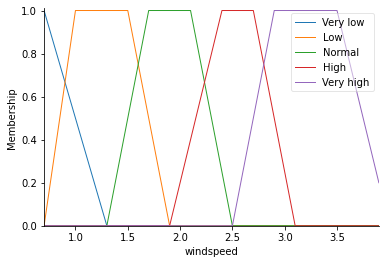

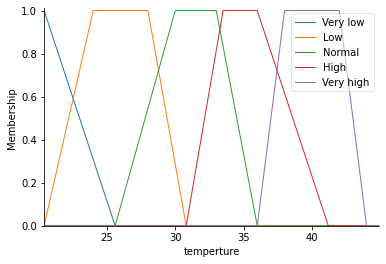

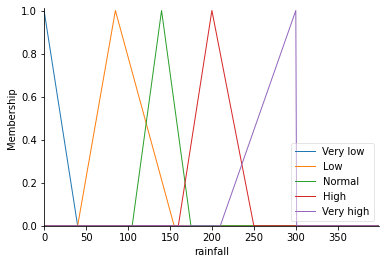

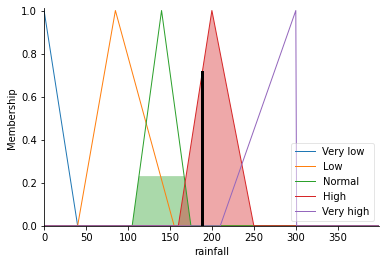

In [32]:
#making range for windspeed and temperture
windspeed   = ctrl.Antecedent(np.arange(0.7,4,0.1),'windspeed')
temperture   = ctrl.Antecedent(np.arange(20.4,45,0.1),'temperture')

rainfall= ctrl.Consequent(np.arange(0,400,1),"rainfall")

#making the function for windspeed
windspeed["Very low"]=fuzz.trimf(windspeed.universe,[0.7,0.7,1.3])
windspeed["Low"]=fuzz.trapmf(windspeed.universe,[0.7,1,1.5,1.9])
windspeed["Normal"]=fuzz.trapmf(windspeed.universe,[1.3,1.7,2.1,2.5])
windspeed["High"]=fuzz.trapmf(windspeed.universe,[1.9,2.4,2.7,3.1])
windspeed["Very high"]=fuzz.trapmf(windspeed.universe,[2.5,2.9,3.5,4])
windspeed.view()

temperture["Very low"]= fuzz.trimf(temperture.universe,[20.4,20.4,25.6])
temperture["Low"]= fuzz.trapmf(temperture.universe,[20.4,24,28,30.8])
temperture["Normal"]= fuzz.trapmf(temperture.universe,[25.6,30,33,36])
temperture["High"]= fuzz.trapmf(temperture.universe,[30.8,33.5,36,41.2])
temperture["Very high"]= fuzz.trapmf(temperture.universe,[36,38,42,44])
temperture.view()

rainfall["Very low"]=fuzz.trimf(rainfall.universe,[0,0,40])
rainfall["Low"]=fuzz.trimf(rainfall.universe,[40,85,155])
rainfall["Normal"]=fuzz.trimf(rainfall.universe,[105,140,175])
rainfall["High"]=fuzz.trimf(rainfall.universe,[160,200,250])
rainfall["Very high"]=fuzz.trimf(rainfall.universe,[210,300,300])
rainfall.view()

#make the rules for all elements
rule1= ctrl.Rule(windspeed["Very low"]&temperture["Very low"] | windspeed["Very low"]&temperture["Low"] | windspeed["Low"]&temperture["Very low"], rainfall["Very low"])
rule2= ctrl.Rule(windspeed["Very low"]&temperture["Normal"]|windspeed["Very low"]&temperture["High"]|windspeed["Low"]&temperture["Low"]|windspeed["Low"]&temperture["Normal"]|windspeed["Normal"]&temperture["Very low"]|windspeed["Normal"]&temperture["Low"], rainfall["Low"])
rule3= ctrl.Rule(windspeed["Low"]&temperture["High"]|windspeed["Very low"]&temperture["Very high"]|windspeed["Normal"]&temperture["Normal"]|windspeed["Normal"]&temperture["High"], rainfall["Normal"])
rule4= ctrl.Rule(windspeed["High"]&temperture["Low"]|windspeed["High"]&temperture["Normal"]|windspeed["Very high"]&temperture["Very low"]|windspeed["Very high"]&temperture["Low"], rainfall["Normal"])
rule5= ctrl.Rule(windspeed["Low"]&temperture["Very high"]|windspeed["Normal"]&temperture["Very high"]|windspeed["High"]&temperture["High"]|windspeed["High"]&temperture["Very high"]|windspeed["Very high"]&temperture["Normal"],rainfall["High"])
rule6 =ctrl.Rule(windspeed["Very high"]&temperture["High"]|windspeed["Very high"]&temperture["Very high"],rainfall["Very high"])

rainfalling_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
rainfalling = ctrl.ControlSystemSimulation(rainfalling_ctrl)

windspeed_input=float(input("Enter the winspeed scale:"))
while windspeed_input>4 or windspeed_input<0:
  try:
   windspeed_input= float(input("Please re-enter the value: "))
  except ValueError:
    print("Not in range or wrongd datatype")

temperture_input=float(input("Enter your temperture: "))
while temperture_input>45 or temperture_input<0:
  try:
    temperture_input= float(input("Please re-enter the value: "))
  except ValueError:
    print("Not in range or wrong datatype")

rainfalling.input['windspeed'] = windspeed_input
rainfalling.input['temperture'] = temperture_input
rainfalling.compute()
rainfall.view(sim = rainfalling)


